### libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def make_bins(df: pd.DataFrame, col, bins: list) -> pd.Series:

    res = pd.Series(index=df.index, dtype=object)

    for i, bin_edge in enumerate(bins):
        if i == 0:
            res.loc[df[col] < bin_edge] = f"[-Inf, {bin_edge})"
        else:
            res.loc[(df[col] >= bins[i - 1]) & (df[col] < bin_edge)] = (
                f"[{bins[i-1]},{bin_edge})"
            )
    res.loc[df[col] >= bins[-1]] = f"[{bins[-1]},Inf)"
    return res

### data

In [3]:
import seaborn as sns

df = sns.load_dataset("titanic")[["survived", "who", "age", "fare"]]
print(f"{df.shape = }")
print(df.head().to_string())

df.shape = (891, 4)
   survived    who   age     fare
0         0    man  22.0   7.2500
1         1  woman  38.0  71.2833
2         1  woman  26.0   7.9250
3         1  woman  35.0  53.1000
4         0    man  35.0   8.0500


In [4]:
# # expand df by 10000 times
# df = pd.concat([df] * 10000, ignore_index=True)
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# print(f"{df.shape = }")

### index

In [5]:
df.head()

,survived,who,age,fare
0,0,man,22.0,7.2500
1,1,woman,38.0,71.2833
2,1,woman,26.0,7.9250
3,1,woman,35.0,53.1000
4,0,man,35.0,8.0500


In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
[i+0.5 for i in df.index][:5]

[0.5, 1.5, 2.5, 3.5, 4.5]

In [8]:
list(df.index)[:5]

[0, 1, 2, 3, 4]

#### auto align

In [59]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [60]:
df['age'].sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [ ]:
df['age2'] = df['age'].sort_values(ascending=False)
df[['age', 'age2']]# auto aligned by index

,age,age2
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,NaN
889,26.0,26.0


In [9]:
df.sort_values('age')['age']

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [ ]:
df.sort_values('age')['age'].fillna(30).rank(method='min') # value is changed, but index is kept

803      1.0
755      2.0
644      3.0
469      3.0
78       5.0
       ...  
859    385.0
863    385.0
868    385.0
878    385.0
888    385.0
Name: age, Length: 891, dtype: float64

In [ ]:
df['age_rank_from_young'] = df.sort_values('age')['age'].fillna(30).rank(method='min')# auto aligned by index
df

,survived,who,age,fare,age_rank_from_young
0,0,man,22.0,7.2500,205.0
1,1,woman,38.0,71.2833,704.0
2,1,woman,26.0,7.9250,302.0
3,1,woman,35.0,53.1000,657.0
4,0,man,35.0,8.0500,657.0
...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0
887,1,woman,19.0,30.0000,140.0
888,0,woman,NaN,23.4500,385.0
889,1,man,26.0,30.0000,302.0


#### aggregation etc

In [ ]:
res = df.groupby("who", dropna=False)["age"].mean()
res# no default range index, index is 'who' values

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [18]:
type(res)

pandas.core.series.Series

In [17]:
res.index

Index(['child', 'man', 'woman'], dtype='object', name='who')

In [19]:
res.values

array([ 6.36951807, 33.17312349, 32.        ])

In [21]:
[i for i in res]

[6.369518072289156, 33.17312348668281, 32.0]

In [24]:
df['avg_age_by_who'] = res
df['avg_age_by_who'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg_age_by_who, dtype: float64

In [25]:
df['avg_age_by_who'] = df['who'].map(res)
df

,survived,who,age,fare,age_rank_from_young,avg_age_by_who
0,0,man,22.0,7.2500,205.0,33.173123
1,1,woman,38.0,71.2833,704.0,32.000000
2,1,woman,26.0,7.9250,302.0,32.000000
3,1,woman,35.0,53.1000,657.0,32.000000
4,0,man,35.0,8.0500,657.0,33.173123
...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123
887,1,woman,19.0,30.0000,140.0,32.000000
888,0,woman,NaN,23.4500,385.0,32.000000
889,1,man,26.0,30.0000,302.0,33.173123


In [46]:
df['avg_age_by_who'] = df['who'].map(df.groupby("who", dropna=False)["age"].mean())
df

,survived,who,age,fare,age_rank_from_young,avg_age_by_who
0,0,man,22.0,7.2500,205.0,33.173123
1,1,woman,38.0,71.2833,704.0,32.000000
2,1,woman,26.0,7.9250,302.0,32.000000
3,1,woman,35.0,53.1000,657.0,32.000000
4,0,man,35.0,8.0500,657.0,33.173123
...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123
887,1,woman,19.0,30.0000,140.0,32.000000
888,0,woman,NaN,23.4500,385.0,32.000000
889,1,man,26.0,30.0000,302.0,33.173123


In [ ]:
df.drop(columns=['avg_age_by_who'], inplace=True)
df = df.merge(df.groupby("who", dropna=False, as_index=False)["age"].mean().rename(columns={"age": "avg_age_by_who"}), on="who", how="left")
df# awkward way

,survived,who,age,fare,age_rank_from_young,avg_age_by_who
0,0,man,22.0,7.2500,205.0,33.173123
1,1,woman,38.0,71.2833,704.0,32.000000
2,1,woman,26.0,7.9250,302.0,32.000000
3,1,woman,35.0,53.1000,657.0,32.000000
4,0,man,35.0,8.0500,657.0,33.173123
...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123
887,1,woman,19.0,30.0000,140.0,32.000000
888,0,woman,NaN,23.4500,385.0,32.000000
889,1,man,26.0,30.0000,302.0,33.173123


#### normalized rank within group

In [50]:
df

,survived,who,age,fare,age_rank_from_young,avg_age_by_who
0,0,man,22.0,7.2500,205.0,33.173123
1,1,woman,38.0,71.2833,704.0,32.000000
2,1,woman,26.0,7.9250,302.0,32.000000
3,1,woman,35.0,53.1000,657.0,32.000000
4,0,man,35.0,8.0500,657.0,33.173123
...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123
887,1,woman,19.0,30.0000,140.0,32.000000
888,0,woman,NaN,23.4500,385.0,32.000000
889,1,man,26.0,30.0000,302.0,33.173123


In [55]:
for i, grp in df.groupby(["who"], dropna=False):
    print(f"{grp = }")
    m = grp['age'].mean()
    std = grp['age'].std()
    res = (grp['age'] - m )/ std
    print(f"{m = }")
    print(f"{std = }")
    print(f"{res = }")
    break

grp =      survived    who    age     fare  age_rank_from_young  avg_age_by_who
7           0  child   2.00  21.0750                 15.0        6.369518
9           1  child  14.00  30.0708                 72.0        6.369518
10          1  child   4.00  16.7000                 31.0        6.369518
14          0  child  14.00   7.8542                 72.0        6.369518
16          0  child   2.00  29.1250                 15.0        6.369518
..        ...    ...    ...      ...                  ...             ...
831         1  child   0.83  18.7500                  5.0        6.369518
850         0  child   4.00  31.2750                 31.0        6.369518
852         0  child   9.00  15.2458                 55.0        6.369518
869         1  child   4.00  11.1333                 31.0        6.369518
875         1  child  15.00   7.2250                 79.0        6.369518

[83 rows x 6 columns]
m = np.float64(6.369518072289156)
std = np.float64(4.729063462074489)
res = 7     -

In [56]:
def age_zscore_in_df(grp: pd.DataFrame) -> pd.Series:
    m = grp['age'].mean()
    std = grp['age'].std()
    res = (grp['age'] - m )/ std
    return res

age_zscore_in_df(df.loc[lambda d: d['who'] == 'child'])

7     -0.923971
9      1.613529
10    -0.501054
14     1.613529
16    -0.923971
         ...   
831   -1.171377
850   -0.501054
852    0.556237
869   -0.501054
875    1.824988
Name: age, Length: 83, dtype: float64

In [ ]:
df['age_zscore'] = df.groupby(['who'], dropna=False).apply(
    age_zscore_in_df, include_groups=False
).reset_index(level=0, drop=True)
df# check first child against above

,survived,who,age,fare,age_rank_from_young,avg_age_by_who,age2,age_zscore
0,0,man,22.0,7.2500,205.0,33.173123,22.0,-0.865670
1,1,woman,38.0,71.2833,704.0,32.000000,38.0,0.521946
2,1,woman,26.0,7.9250,302.0,32.000000,26.0,-0.521946
3,1,woman,35.0,53.1000,657.0,32.000000,35.0,0.260973
4,0,man,35.0,8.0500,657.0,33.173123,35.0,0.141543
...,...,...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123,27.0,-0.478281
887,1,woman,19.0,30.0000,140.0,32.000000,19.0,-1.130883
888,0,woman,NaN,23.4500,385.0,32.000000,NaN,NaN
889,1,man,26.0,30.0000,302.0,33.173123,26.0,-0.555758


In [66]:
# better way using transform
df['age_zscore_v2'] = df.groupby(['who'], dropna=False)['age'].transform(
    lambda x: (x - x.mean()) / x.std()
)
df

,survived,who,age,fare,age_rank_from_young,avg_age_by_who,age2,age_zscore,age_zscore_v2
0,0,man,22.0,7.2500,205.0,33.173123,22.0,-0.865670,-0.865670
1,1,woman,38.0,71.2833,704.0,32.000000,38.0,0.521946,0.521946
2,1,woman,26.0,7.9250,302.0,32.000000,26.0,-0.521946,-0.521946
3,1,woman,35.0,53.1000,657.0,32.000000,35.0,0.260973,0.260973
4,0,man,35.0,8.0500,657.0,33.173123,35.0,0.141543,0.141543
...,...,...,...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123,27.0,-0.478281,-0.478281
887,1,woman,19.0,30.0000,140.0,32.000000,19.0,-1.130883,-1.130883
888,0,woman,NaN,23.4500,385.0,32.000000,NaN,NaN,NaN
889,1,man,26.0,30.0000,302.0,33.173123,26.0,-0.555758,-0.555758


In [72]:
# however if multiple columns are involved, apply is needed
def age_zscore_in_df_complex(grp: pd.DataFrame) -> pd.Series:
    grp.loc[lambda d: d['fare'].isna(), 'fare'] = grp['fare'].mean()
    grp.loc[lambda d: d['age'].isna(), 'age'] = grp['age'].mean()

    m = np.average(grp['age'], weights=grp['fare'])
    std = np.sqrt(np.average((grp['age'] - m)**2, weights=grp['fare']))
    res = (grp['age'] - m )/ std
    return res

df['age_zscore_complex'] = df.groupby(['who'], dropna=False).apply(
    age_zscore_in_df_complex, include_groups=False
).reset_index(level=0, drop=True)
df

,survived,who,age,fare,age_rank_from_young,avg_age_by_who,age2,age_zscore,age_zscore_v2,age_zscore_complex
0,0,man,22.0,7.2500,205.0,33.173123,22.0,-0.865670,-0.865670,-1.093284
1,1,woman,38.0,71.2833,704.0,32.000000,38.0,0.521946,0.521946,0.396831
2,1,woman,26.0,7.9250,302.0,32.000000,26.0,-0.521946,-0.521946,-0.685802
3,1,woman,35.0,53.1000,657.0,32.000000,35.0,0.260973,0.260973,0.126173
4,0,man,35.0,8.0500,657.0,33.173123,35.0,0.141543,0.141543,-0.042525
...,...,...,...,...,...,...,...,...,...,...
886,0,man,27.0,13.0000,320.0,33.173123,27.0,-0.478281,-0.478281,-0.689146
887,1,woman,19.0,30.0000,140.0,32.000000,19.0,-1.130883,-1.130883,-1.317338
888,0,woman,NaN,23.4500,385.0,32.000000,NaN,NaN,NaN,-0.144485
889,1,man,26.0,30.0000,302.0,33.173123,26.0,-0.555758,-0.555758,-0.769974


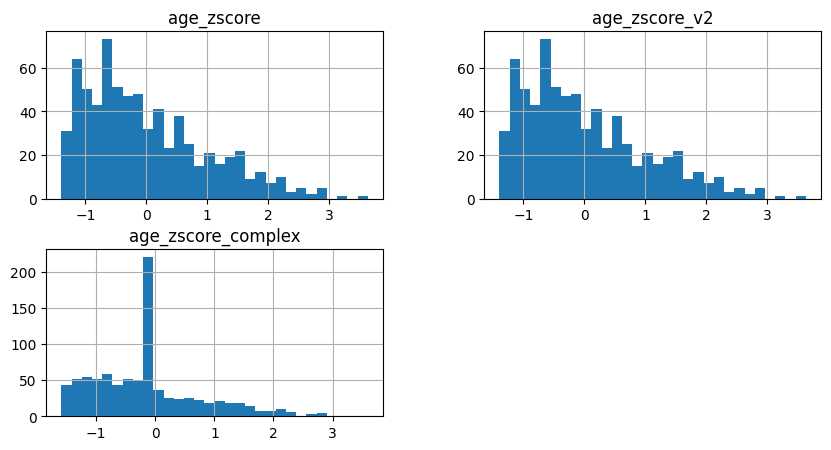

In [74]:
axes = df[['age_zscore', 'age_zscore_v2', 'age_zscore_complex']].hist(bins=30, figsize=(10, 5))

### step by step

In [5]:
df2 = df.copy()

In [6]:
df2["id"] = range(1, len(df2) + 1)

#### avg age in who

In [7]:
df2["avg_age_in_who"] = df2.groupby("who", dropna=False)["age"].transform("mean")

In [8]:
df2['who']# A

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [9]:
for i, grp in df2.groupby("who", dropna=False):
    print(f"{i = }")
    print(f"{grp.shape = }")
    print(f"{grp.max()['age'] = }")
    print(f"{type(grp) = }")
    print(f"{" "}")

i = 'child'
grp.shape = (83, 6)
grp.max()['age'] = np.float64(15.0)
type(grp) = <class 'pandas.core.frame.DataFrame'>
 
i = 'man'
grp.shape = (537, 6)
grp.max()['age'] = np.float64(80.0)
type(grp) = <class 'pandas.core.frame.DataFrame'>
 
i = 'woman'
grp.shape = (271, 6)
grp.max()['age'] = np.float64(63.0)
type(grp) = <class 'pandas.core.frame.DataFrame'>
 


In [10]:
df2.groupby("who", dropna=False)['age'].transform('max')# B

0      80.0
1      63.0
2      63.0
3      63.0
4      80.0
       ... 
886    80.0
887    63.0
888    63.0
889    80.0
890    80.0
Name: age, Length: 891, dtype: float64

In [41]:
for i, grp in df2.groupby("who", dropna=False):
    print(f"{i = }")
    print(f"{grp.shape = }")
    wavg = (grp['age'] * grp['fare']).sum() / grp['fare'].sum()
    print(f"{wavg = }")

i = 'child'
grp.shape = (83, 11)
wavg = np.float64(6.698837714393651)
i = 'man'
grp.shape = (537, 11)
wavg = np.float64(29.626678530548862)
i = 'woman'
grp.shape = (271, 11)
wavg = np.float64(29.67760581225263)


In [ ]:
(
    df2
    .groupby("who", dropna=False)['age']
    .transform(lambda x: (x * df2.loc[x.index,'fare']).sum() / df2.loc[x.index,'fare'].sum())
)


0      29.626679
1      29.677606
2      29.677606
3      29.677606
4      29.626679
         ...    
886    29.626679
887    29.677606
888    29.677606
889    29.626679
890    29.626679
Name: age, Length: 891, dtype: float64

In [51]:
(
    df2
    .groupby("who", dropna=False)['age']
    .transform(lambda x: print(f"{type(x) = }, {x.shape = }, {x.head(1) = }"))
)

type(x) = <class 'pandas.core.series.Series'>, x.shape = (83,), x.head(1) = 7    2.0
Name: child, dtype: float64
type(x) = <class 'pandas.core.series.Series'>, x.shape = (537,), x.head(1) = 0    22.0
Name: man, dtype: float64
type(x) = <class 'pandas.core.series.Series'>, x.shape = (271,), x.head(1) = 1    38.0
Name: woman, dtype: float64


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: age, Length: 891, dtype: float64

In [43]:
def weighted_avg(group):
    return (group["age"] * group["fare"]).sum() / group["fare"].sum()

# compute weighted average per group and map it back to each row
wavg_by_who = df2.groupby("who", dropna=False).apply(weighted_avg)
df2["weighted_avg_age_in_who"] = df2["who"].map(wavg_by_who)

# show the resulting per-row series
df2["weighted_avg_age_in_who"]

C:\Users\yzdom\AppData\Local\Temp\ipykernel_24480\1868038047.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wavg_by_who = df2.groupby("who", dropna=False).apply(weighted_avg)


0      29.626679
1      29.677606
2      29.677606
3      29.677606
4      29.626679
         ...    
886    29.626679
887    29.677606
888    29.677606
889    29.626679
890    29.626679
Name: weighted_avg_age_in_who, Length: 891, dtype: float64

#### the other 2 transforms/applies

In [11]:
df2["cumcount_in_who_by_fare"] = (
    df2.sort_values(["fare", "id"], na_position="last")
    .groupby("who", dropna=False)
    .cumcount()
    + 1
)

In [12]:
df2["age_of_lowest_fare_in_who"] = (
    df2.sort_values(["fare", "id"], na_position="last")
    .groupby("who", dropna=False)["age"]
    .transform("first")
)

#### case when lambda 

In [13]:
src_col = "fare"
col = "fare_bin"

df2.loc[lambda x: x[src_col] < 0, col] = "[-Inf, 0)"
df2.loc[lambda x: (x[src_col] >= 0) & (x[src_col] < 10), col] = "[0,10)"
df2.loc[lambda x: (x[src_col] >= 10) & (x[src_col] < 20), col] = "[10,20)"
df2.loc[lambda x: (x[src_col] >= 20) & (x[src_col] < 30), col] = "[20,30)"
df2.loc[lambda x: (x[src_col] >= 30) & (x[src_col] < 100), col] = "[30,100)"
df2.loc[lambda x: x[src_col] >= 100, col] = "[100,Inf)"

In [14]:
type(lambda x:x)

function

In [15]:
(lambda x: x+1)(1)

2

In [16]:
func = (lambda x: x+1)

In [17]:
func(1)

2

In [18]:
def func(x):
    return x + 1
func(1)

2

In [19]:
df2.loc[df['fare'] < 10]

,survived,who,age,fare,id,avg_age_in_who,cumcount_in_who_by_fare,age_of_lowest_fare_in_who,fare_bin
0,0,man,22.0,7.2500,1,33.173123,65,36.0,"[0,10)"
2,1,woman,26.0,7.9250,3,32.000000,41,18.0,"[0,10)"
4,0,man,35.0,8.0500,5,33.173123,193,36.0,"[0,10)"
5,0,man,NaN,8.4583,6,33.173123,240,36.0,"[0,10)"
12,0,man,20.0,8.0500,13,33.173123,194,36.0,"[0,10)"
...,...,...,...,...,...,...,...,...,...
877,0,man,19.0,7.8958,878,33.173123,177,36.0,"[0,10)"
878,0,man,NaN,7.8958,879,33.173123,178,36.0,"[0,10)"
881,0,man,33.0,7.8958,882,33.173123,179,36.0,"[0,10)"
884,0,man,25.0,7.0500,885,33.173123,35,36.0,"[0,10)"


In [20]:
df['fare'] < 10

0       True
1      False
2       True
3      False
4       True
       ...  
886    False
887    False
888    False
889    False
890     True
Name: fare, Length: 891, dtype: bool

In [21]:
df2.loc[lambda x: x['fare'] < 10 ,:]

,survived,who,age,fare,id,avg_age_in_who,cumcount_in_who_by_fare,age_of_lowest_fare_in_who,fare_bin
0,0,man,22.0,7.2500,1,33.173123,65,36.0,"[0,10)"
2,1,woman,26.0,7.9250,3,32.000000,41,18.0,"[0,10)"
4,0,man,35.0,8.0500,5,33.173123,193,36.0,"[0,10)"
5,0,man,NaN,8.4583,6,33.173123,240,36.0,"[0,10)"
12,0,man,20.0,8.0500,13,33.173123,194,36.0,"[0,10)"
...,...,...,...,...,...,...,...,...,...
877,0,man,19.0,7.8958,878,33.173123,177,36.0,"[0,10)"
878,0,man,NaN,7.8958,879,33.173123,178,36.0,"[0,10)"
881,0,man,33.0,7.8958,882,33.173123,179,36.0,"[0,10)"
884,0,man,25.0,7.0500,885,33.173123,35,36.0,"[0,10)"


#### case when loop

In [22]:
col = 'fare'
bins = [0, 10, 20, 30, 100]

res = pd.Series(index=df.index, dtype=object)

for i, bin_edge in enumerate(bins):
    print(f"{i = }, {bin_edge = }")
    print(f"{bins[i] = }")
    print(f"{bins[i-1] = }")
    print()
    # if i == 0:
    #     res.loc[df[col] < bin_edge] = f"[-Inf, {bin_edge})"
    # else:
    #     res.loc[(df[col] >= bins[i - 1]) & (df[col] < bin_edge)] = (
    #         f"[{bins[i-1]},{bin_edge})"
    #     )
    
# res.loc[df[col] >= bins[-1]] = f"[{bins[-1]},Inf)"

res

i = 0, bin_edge = 0
bins[i] = 0
bins[i-1] = 100

i = 1, bin_edge = 10
bins[i] = 10
bins[i-1] = 0

i = 2, bin_edge = 20
bins[i] = 20
bins[i-1] = 10

i = 3, bin_edge = 30
bins[i] = 30
bins[i-1] = 20

i = 4, bin_edge = 100
bins[i] = 100
bins[i-1] = 30



0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Length: 891, dtype: object

In [24]:
make_bins(df2, "fare", bins=[0, 10, 20, 30, 100])

0        [0,10)
1      [30,100)
2        [0,10)
3      [30,100)
4        [0,10)
         ...   
886     [10,20)
887    [30,100)
888     [20,30)
889    [30,100)
890      [0,10)
Length: 891, dtype: object

#### stats

In [25]:
import scipy.stats as stats

np.random.seed(42)

df2["fare_adj"] = np.clip(
    df2["fare"] + stats.norm.rvs(loc=2, scale=5, size=len(df2.index)),
    a_min=0,
    a_max=None,
)

In [26]:
np.clip(
    pd.Series([-1, 3, 5]),
    a_min=0,
    a_max=None,
)

0    0
1    3
2    5
dtype: int64

In [27]:
type(stats.norm.rvs(loc=2, scale=5, size=3))

numpy.ndarray

In [28]:
stats.norm.cdf(0)

np.float64(0.5)

In [29]:
stats.norm.fit([-0.5,0,0.5])

(np.float64(0.0), np.float64(0.408248290463863))

In [30]:
df2["fare_adj_bin"] = make_bins(df2, "fare_adj", bins=[0, 10, 20, 30, 100])

In [73]:
n_cols = 2
stats.norm.rvs(loc=2, scale=5, size=df.shape[0] * n_cols).reshape(df.shape[0], n_cols)

array([[-1.02995023, -2.7138762 ],
       [ 0.46211305, -2.8387617 ],
       [ 4.82249102, -3.8087565 ],
       ...,
       [-2.13245688, -2.33486728],
       [ 2.21512243,  7.33733926],
       [ 0.26005225, -9.26266757]], shape=(891, 2))

In [72]:
n_cols = 3
colnames = [f"rv_{i}" for i in range(1, n_cols + 1)]
df[colnames] = stats.norm.rvs(loc=2, scale=5, size=df.shape[0] * n_cols).reshape(df.shape[0], n_cols)
df[colnames].head()

,rv_1,rv_2,rv_3
0,3.410181,1.235725,4.167812
1,10.814898,-0.538584,-6.575900
2,6.129618,10.416573,3.963842
3,-3.438743,1.380538,-3.592617
4,5.214277,-4.756452,0.499356


#### loc and select

In [ ]:
df2 = df2.loc[
    lambda x: x["fare"] < 50,
    [
        "id",
        "who",
        "age",
        "fare",
        "fare_adj",
        "fare_bin",
        "fare_adj_bin",
        "avg_age_in_who",
        "cumcount_in_who_by_fare",
        "age_of_lowest_fare_in_who",
    ],
]

In [ ]:
print(f"{df2.shape = }")
print(df2.head().to_string())

df2.shape = (7300000, 10)
   id    who   age     fare   fare_adj fare_bin fare_adj_bin  avg_age_in_who  cumcount_in_who_by_fare  age_of_lowest_fare_in_who
1   2    man  48.0   7.8542   9.162878   [0,10)       [0,10)       33.173123                  1310001                       36.0
2   3  woman  26.0   7.9250  13.163443   [0,10)      [10,20)       32.000000                   400001                       18.0
4   5    man  30.0  24.0000  24.829233  [20,30)      [20,30)       33.173123                  3730001                       36.0
5   6  woman  28.0   7.8958   8.725115   [0,10)       [0,10)       32.000000                   390001                       18.0
6   7    man  31.0  13.0000  22.896064  [10,20)      [20,30)       33.173123                  2950001                       36.0


### in one go with funcs

In [35]:
bins = [0, 10, 20, 30, 100]
np.random.seed(42)

df2_2 = df.assign(
    id=lambda x: range(1, len(x) + 1),
    avg_age_in_who=lambda x: x.groupby("who", dropna=False)["age"].transform("mean"),
    cumcount_in_who_by_fare=lambda x: x.sort_values(["fare", "id"], na_position="last")
    .groupby("who", dropna=False)
    .cumcount()
    + 1,
    age_of_lowest_fare_in_who=lambda x: x.sort_values(
        ["fare", "id"], na_position="last"
    )
    .groupby("who", dropna=False)["age"]
    .transform("first"),
    fare_bin=lambda x: make_bins(x, "fare", bins=bins),
    fare_adj=lambda x: np.clip(
        x["fare"] + stats.norm.rvs(loc=2, scale=5, size=len(x.index)),
        a_min=0,
        a_max=None,
    ),
    fare_adj_bin=lambda x: make_bins(x, "fare_adj", bins=bins),
).loc[
    lambda x: x["fare"] < 50,
    [
        "id",
        "who",
        "age",
        "fare",
        "fare_adj",
        "fare_bin",
        "fare_adj_bin",
        "avg_age_in_who",
        "cumcount_in_who_by_fare",
        "age_of_lowest_fare_in_who",
    ],
]
print(f"{df2_2.shape = }")
print(df2_2.head().to_string())

df2_2.shape = (7300000, 10)
   id    who   age     fare   fare_adj fare_bin fare_adj_bin  avg_age_in_who  cumcount_in_who_by_fare  age_of_lowest_fare_in_who
1   2    man  48.0   7.8542   9.162878   [0,10)       [0,10)       33.173123                  1310001                       36.0
2   3  woman  26.0   7.9250  13.163443   [0,10)      [10,20)       32.000000                   400001                       18.0
4   5    man  30.0  24.0000  24.829233  [20,30)      [20,30)       33.173123                  3730001                       36.0
5   6  woman  28.0   7.8958   8.725115   [0,10)       [0,10)       32.000000                   390001                       18.0
6   7    man  31.0  13.0000  22.896064  [10,20)      [20,30)       33.173123                  2950001                       36.0


In [155]:
func = lambda x,y,z: x + y + z

func(1,2,3)

6

In [158]:
func(*[1,2,3])

6

In [36]:
assert df2.compare(df2_2).empty, "DataFrames are not equal!"

### check results while using aggs

In [37]:
df2.groupby(["who"], dropna=False).agg(
    **{
        "n": ("who", "size"),
        "avg_age": ("age", "mean"),
        "max_avg_age_in_who": ("avg_age_in_who", "max"),
    }
).assign(
    equal=lambda x: np.where(
        np.abs(x["avg_age"] - x["max_avg_age_in_who"]) < 0.01, True, False
    )
)

,n,avg_age,max_avg_age_in_who,equal
who,,,,
child,770000,6.256494,6.369518,False
man,4660000,32.500000,33.173123,False
woman,1870000,30.273973,32.000000,False


In [40]:
df2.loc[
    lambda x: x["who"] == "child", ["id", "who", "fare", "cumcount_in_who_by_fare"]
].sort_values(["fare", "id"]).head(20)

,id,who,fare,cumcount_in_who_by_fare
116,117,child,7.225,1
331,332,child,7.225,2
1631,1632,child,7.225,3
2317,2318,child,7.225,4
2673,2674,child,7.225,5
3223,3224,child,7.225,6
6341,6342,child,7.225,7
7972,7973,child,7.225,8
8565,8566,child,7.225,9
10343,10344,child,7.225,10


In [41]:
df2.loc[
    lambda x: x["who"] == "man", ["id", "who", "fare", "cumcount_in_who_by_fare"]
].sort_values(["fare", "id"]).head(20)

,id,who,fare,cumcount_in_who_by_fare
227,228,man,0.0,1
252,253,man,0.0,2
309,310,man,0.0,3
324,325,man,0.0,4
344,345,man,0.0,5
352,353,man,0.0,6
556,557,man,0.0,7
565,566,man,0.0,8
603,604,man,0.0,9
664,665,man,0.0,10


In [43]:
df2.loc[
    lambda x: x["fare_bin"] != x["fare_adj_bin"],
    ["fare", "fare_bin", "fare_adj", "fare_adj_bin"],
].head(20)

,fare,fare_bin,fare_adj,fare_adj_bin
2,7.9250,"[0,10)",13.163443,"[10,20)"
6,13.0000,"[10,20)",22.896064,"[20,30)"
7,18.0000,"[10,20)",23.837174,"[20,30)"
9,7.8958,"[0,10)",12.608600,"[10,20)"
24,30.0708,"[30,100)",29.348886,"[20,30)"
27,9.8250,"[0,10)",13.703490,"[10,20)"
31,7.2292,"[0,10)",18.490591,"[10,20)"
34,27.0000,"[20,30)",33.112725,"[30,100)"
36,7.9250,"[0,10)",10.969318,"[10,20)"
39,7.1250,"[0,10)",10.109306,"[10,20)"


In [44]:
_ = df2.loc[
    lambda x: x["cumcount_in_who_by_fare"] == 1,
    [
        "id",
        "who",
        "fare",
        "age",
        "cumcount_in_who_by_fare",
        "age_of_lowest_fare_in_who",
    ],
]
print(_.head().to_string())

        id    who   fare   age  cumcount_in_who_by_fare  age_of_lowest_fare_in_who
116    117  child  7.225  15.0                        1                       15.0
227    228    man  0.000   NaN                        1                       36.0
2194  2195  woman  6.750  18.0                        1                       18.0
